# "Andere Daten"

## Zähldaten

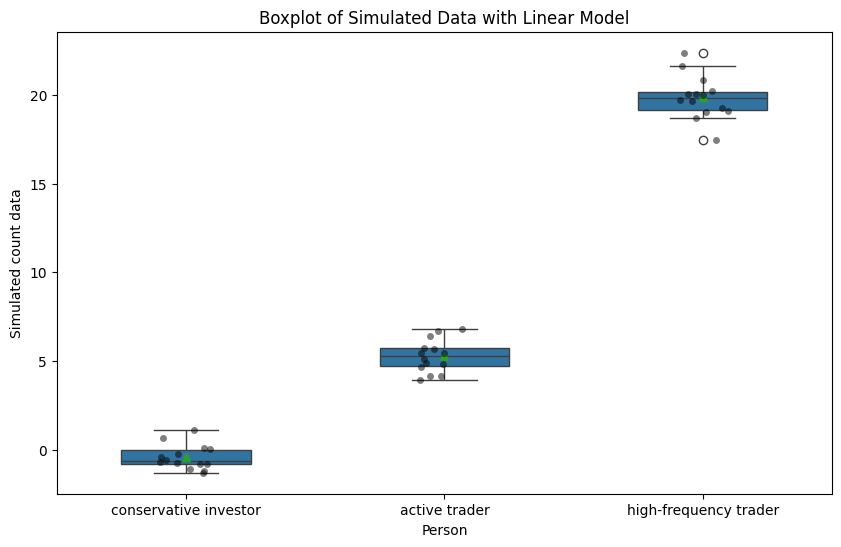

/Users/tim/.pyenv/versions/3.11.2/envs/venv-hwz-cas-ml-finance/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/tim/.pyenv/versions/3.11.2/envs/venv-hwz-cas-ml-finance/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/tim/.pyenv/versions/3.11.2/envs/venv-hwz-cas-ml-finance/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/tim/.pyenv/versions/3.11.2/envs/venv-hwz-cas-ml-finance/lib/python3.11/site-packages/st

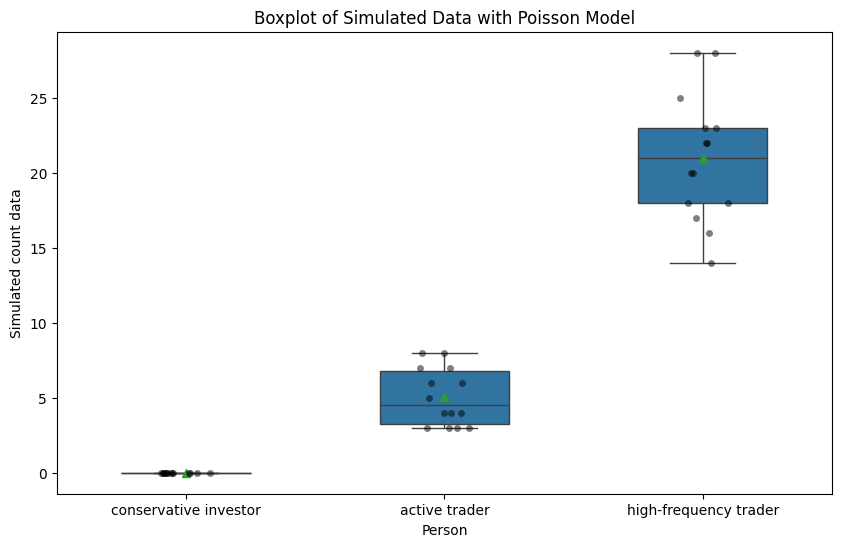

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.genmod.families import Poisson
from statsmodels.formula.api import glm

# Simulated count data in finance
data = {
    'person': ['conservative investor'] * 14 + ['active trader'] * 14 + ['high-frequency trader'] * 14,
    'count_variable': [0] * 14 + [5] * 14 + [20] * 14 
}

df = pd.DataFrame(data)

# Fitting a Linear Model
lm_traders = ols('count_variable ~ person', data=df).fit()

# Simulating new observations from the Linear Model
simulated_data_linear = np.random.normal(lm_traders.predict(df))

# Plotting boxplot with stripplot for linear model
plt.figure(figsize=(10, 6))
sns.boxplot(x='person', y=simulated_data_linear, data=df, width=0.5, showmeans=True)
sns.stripplot(x='person', y=simulated_data_linear, data=df, color='black', size=5, jitter=True, alpha=0.5)
plt.xlabel('Person')
plt.ylabel('Simulated count data')
plt.title('Boxplot of Simulated Data with Linear Model')
plt.show()

# Fitting a Poisson Model
poisson_model = glm('count_variable ~ person', data=df, family=Poisson()).fit()

# Simulating new observations from the Poisson Model
np.random.seed(1)
simulated_data_poisson = np.random.poisson(poisson_model.predict(df))

# Plotting boxplot with stripplot for Poisson model
plt.figure(figsize=(10, 6))
sns.boxplot(x='person', y=simulated_data_poisson, data=df, width=0.5, showmeans=True)
sns.stripplot(x='person', y=simulated_data_poisson, data=df, color='black', size=5, jitter=True, alpha=0.5)
plt.xlabel('Person')
plt.ylabel('Simulated count data')
plt.title('Boxplot of Simulated Data with Poisson Model')
plt.show()

In [2]:
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         count_variable   No. Observations:                   42
Model:                            GLM   Df Residuals:                       39
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -58.258
Date:                Thu, 15 Feb 2024   Deviance:                   4.4043e-09
Time:                        19:45:23   Pearson chi2:                 2.20e-09
No. Iterations:                    24   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           1.6094      0.120     13.466      0.000       1.375       1.844
person[T.conservative investor]   -24.1823   1.29e+04     -0.002      0.999   -2.54e+04    2.53e+04
person[T.high-frequency trader]     1.3863      0.134     10.374      0.000       1.124       1.648
===================================================================================================
"""

**Achtung**: Da log() als Link-Funktion verwendet wird, muss für die Interpretation jeweils mit exp() wieder der korrekte Wert berechnet werden.

In [24]:
# Expontial function to interpret coefficient
np.exp(1.6094)

4.999810441422834

Die erwartete Anzahl Trades für die Basiskategorie (die standardmässig die erste Kategorie in alphabetischer Reihenfolge ist, in diesem Fall "active Trader", da sie nicht in der Zusammenfassung angezeigt wird) beträgt also etwa 5.

In [26]:
# Expontial function to interpret coefficient
np.exp(-24.1823)

3.146013270794804e-11

Der "convervative trader" macht gemäss dem Modell im Vergleich zur Basiskategorie nahezu 0 Trades.

In [27]:
np.exp(1.3863)

4.000022555584032

Der "high-frequency Trader" macht ca. 4x mehr Trades im Vergleich zum "active Trader".

In [9]:
simulated_data_linear

array([ 1.11089598, -0.55416743, -1.27714602, -0.65842704, -0.80483676,
       -0.41458722, -0.81107309, -1.09102953, -0.24468151, -1.17635204,
       -0.73591179,  0.69743062,  0.10636266,  0.05650009,  3.96109959,
        4.68903374,  4.19356991,  6.41566358,  4.90752635,  4.83634548,
        5.66496976,  6.83637809,  4.19552421,  5.48131148,  5.46192871,
        5.74401572,  6.68325226,  5.13267923, 20.05389705, 20.02167117,
       22.36541721, 21.64513034, 20.8095867 , 19.72272772, 18.68914039,
       19.03560847, 19.26199573, 19.96034163, 19.66002028, 20.22113175,
       19.06848633, 17.4286998 ])

In [4]:
simulated_data_poisson

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  5,  3,
        3,  6,  6,  4,  4,  4,  3,  7,  8,  8,  7, 22, 20, 18, 22, 28, 23,
       28, 14, 20, 25, 17, 16, 18, 23])

## Binäre & binomiale Daten (Logistische Regression)

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a simulated dataset
data = {
    'defaulted': [50, 120, 200, 300, 400],
    'not_defaulted': [950, 880, 800, 700, 600],
    'credit_score_band': [1, 2, 3, 4, 5]  # Assume 1 = highest credit score band, 5 = lowest
}
df = pd.DataFrame(data)

# Compute the total number of loans and the default rate
df['total_loans'] = df['defaulted'] + df['not_defaulted']
df['default_rate'] = df['defaulted'] / df['total_loans']

# Display the updated dataset with default rates
print(df)


   defaulted  not_defaulted  credit_score_band  total_loans  default_rate
0         50            950                  1         1000          0.05
1        120            880                  2         1000          0.12
2        200            800                  3         1000          0.20
3        300            700                  4         1000          0.30
4        400            600                  5         1000          0.40


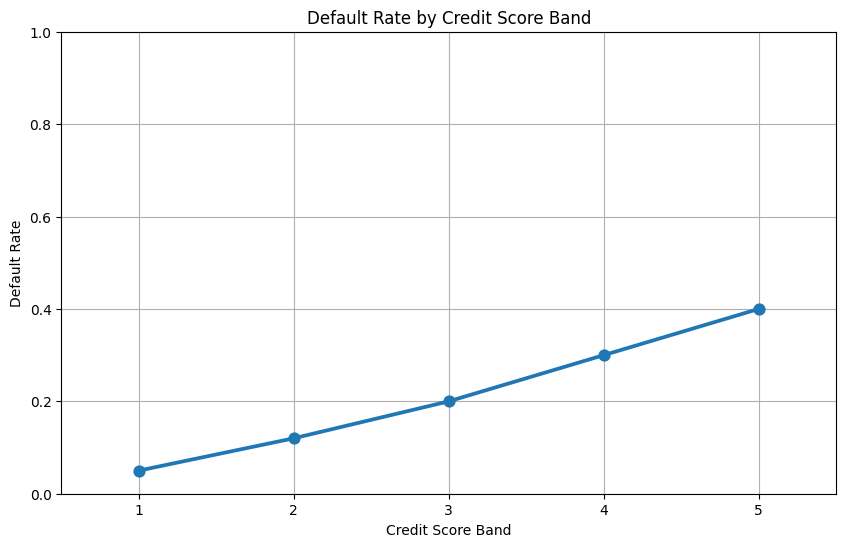

In [29]:
# Plotting the default rates by credit score band
plt.figure(figsize=(10, 6))
sns.pointplot(x='credit_score_band', y='default_rate', data=df)
plt.xlabel('Credit Score Band')
plt.ylabel('Default Rate')
plt.title('Default Rate by Credit Score Band')
plt.grid(True)
plt.ylim(0, 1)  # Default rate is a probability, so we limit the y-axis from 0 to 1
plt.show()

In [30]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Simulated data
np.random.seed(0)  # For reproducibility
credit_score_band = np.arange(1, 6)  # Credit score bands from 1 to 5
default_probability = np.array([0.05, 0.1, 0.2, 0.4, 0.8])  # Hypothetical default probabilities for each band

# Generate binary outcomes based on default probabilities
defaults = np.random.binomial(1, default_probability, size=(100, 5)).mean(axis=0)

# Create a DataFrame
df = pd.DataFrame({
    'credit_score_band': credit_score_band,
    'default_probability': default_probability,
    'defaults': defaults})

# Print the DataFrame
print(df)

   credit_score_band  default_probability  defaults
0                  1                 0.05      0.07
1                  2                 0.10      0.09
2                  3                 0.20      0.17
3                  4                 0.40      0.50
4                  5                 0.80      0.78


In [31]:
# Define predictor and response variables
X = sm.add_constant(df['credit_score_band'])  # Add a constant term for the intercept
y = df['defaults']

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Print the model summary
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.342054
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               defaults   No. Observations:                    5
Model:                          Logit   Df Residuals:                        3
Method:                           MLE   Df Model:                            1
Date:                Thu, 15 Feb 2024   Pseudo R-squ.:                  0.3603
Time:                        20:03:18   Log-Likelihood:                -1.7103
converged:                       True   LL-Null:                       -2.6737
Covariance Type:            nonrobust   LLR p-value:                    0.1651
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.4989      4.002     -1.124      0.261     -12.343       3.346
credit_s

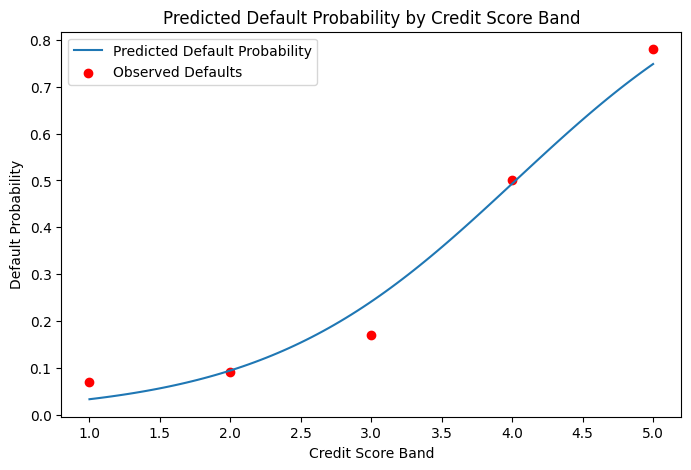

In [32]:
# Predict default probabilities across a range of credit score bands
X_pred = sm.add_constant(np.linspace(1, 5, 100))
y_pred = model.predict(X_pred)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(np.linspace(1, 5, 100), y_pred, label='Predicted Default Probability')
plt.scatter(df['credit_score_band'], df['defaults'], color='red', label='Observed Defaults')
plt.xlabel('Credit Score Band')
plt.ylabel('Default Probability')
plt.title('Predicted Default Probability by Credit Score Band')
plt.legend()
plt.show()